# Theory: Autocorrelation

In [1]:
import utils
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

import importlib
importlib.reload(utils);

## Correlation

Correlation is a quantity for measuring the statistical relationship between two stochastic processes.

The correlation between two stochastic variables $\mathbf{X}$ and $\mathbf{Y}$, denoted $r_{xy}$ is given by:

\begin{align}
r_{xy} = \mathbb{E}[\mathbf{X}  \mathbf{Y}]
\end{align}

## Covariance

Covariance is a measure of the linear relationship between two random variables. If the relationship between the random variables
is nonlinear, the covariance may not reflect the strength of this relationship.

## Correlation Coefficient

The most commonly used linear correlation coefficient is known as the Pearson product moment correlation coefficient [(#)](https://www.geo.fu-berlin.de/en/v/soga/Basics-of-statistics/Descriptive-Statistics/Measures-of-Relation-Between-Variables/Correlation/index.html). Person's correlation coefficient assumes that the two random variables follow a Gaussian distribution.

The correlation coefficient between two stochastic variables $\mathbf{X}$ and $\mathbf{Y}$, denoted $\rho_{xy}$ is given by:

\begin{align}
\rho_{xy} = 
\frac{
  \text{cov}(\mathbf{X}, \mathbf{Y})
}{
  \sigma_x \sigma_y
}
\end{align}

The correlation coefficient can only take values in the range $-1 \leq \rho_{xy} \leq 1$:
- $\rho_{xy}$ close to 1 indicates a positive correlation
- $\rho_{xy}$ close to -1 indicates a negative correlation
- $\rho_{xy}$ around zero indicates no correlation.

The correlation coefficient is a useful quantity for measuring both the direction and the strength of the linear relationship between two random variables.

<img src="figures/linear-correlation-examples.png" width="600" />

[Source](https://www.geo.fu-berlin.de/en/v/soga/Basics-of-statistics/Descriptive-Statistics/Measures-of-Relation-Between-Variables/Correlation/index.html)























## Autocorrelation

Autocorrelation is the correlation between a signal $x[n]$ and a delayed/shifted/lagged version of the signal itself $x[n - \ell]$. It provides a measure of the linear dependence between the signal at two different times; $n$ and $n-\ell$. Informally, it describes how well the present value of the series is related with its past values. 

The autocorrelation function ACF computes the autocorrelation for a number of lags. 

<img src="figures/autocorrelation-example.png" width="350" />

[Source Wikipedia](https://en.wikipedia.org/wiki/Autocorrelation)

### AFC of S&P 500 Prices

Let us compute the autocorrelation sequence for S&P 500 closing prices:

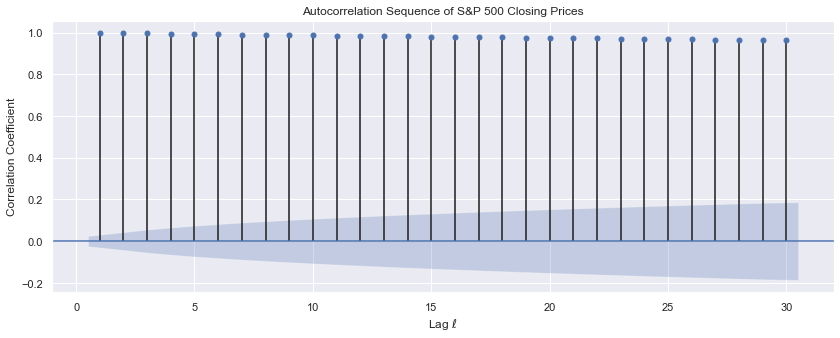

In [2]:
fig, ax = plt.subplots(figsize=(14, 5))
sgt.plot_acf(utils.load_sp500_data(), lags=30, zero=False, ax=ax);
ax.set_ylabel('Correlation Coefficient')
ax.set_xlabel('Lag $\ell$')
ax.set_title('Autocorrelation Sequence of S&P 500 Closing Prices');

The plot known as correlogram or autocorrelation plot gives us two types of information:

1. The **stem plot** represents the correlation coefficient for each lag $\ell$
2. The **confidence band** (the blue cone around the x-axis) represents statistical significance (default 95% confidence interval):
  - When a coefficient value at lag $\ell$ is inside the blue area, it is not significantly different from zero. In other words, we have no evidence to indicate that it is no different than zero i.e., no statistical significance.
  - When a coefficient value at lag $\ell$ is situated outside the blue area, then it is significantly different from zero suggesting that the correlation exists and is not a statistical fluke.
 

In the figure above, we observe that the blue area expands as the lag values increase. The greater the distance in time, the more unlikely it is that this autocorrelation persists. For example, today's closing price is closer to yesterday's price than the closing price 30 days ago. Therefore, we need to make sure that the autocorrelation coefficient in higher lags is sufficiently greater to be significantly different from zero. 

All the autocorrelation coefficients are outside the confidence band. This suggests **time dependence** in the data. We also observe that the autocorrelation coefficient does not diminish as the lags increase. This suggests that the closing price 30 days in the past can still serve as decent estimator of the future prices.

### AFC of Random Walk

The data generated by a random walk process is very much like the stock market price data.
Now, let us compare the autocorrelation of a random walk.

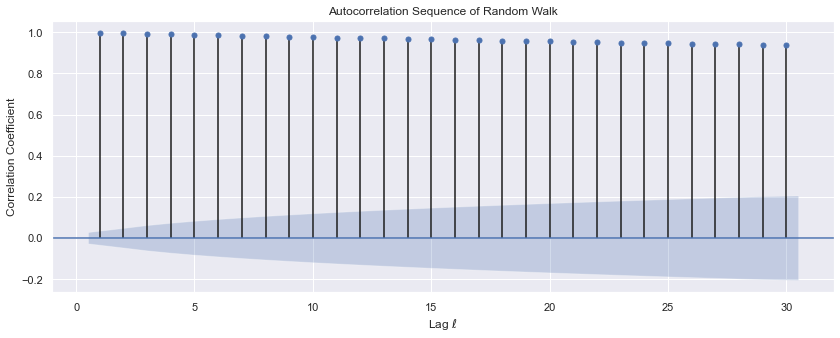

In [3]:
fig, ax = plt.subplots(figsize=(14, 5))
sgt.plot_acf(utils.load_random_walk_data(), lags=30, zero=False, ax=ax);
ax.set_ylabel('Correlation Coefficient')
ax.set_xlabel('Lag $\ell$')
ax.set_title('Autocorrelation Sequence of Random Walk');

### ACF of White Noise

Being able to distinguish white noise from regular signal is very important. 
White noise has no correlation between its values at different times.
To confirm this knowledge, let us compute the autocorrelation.

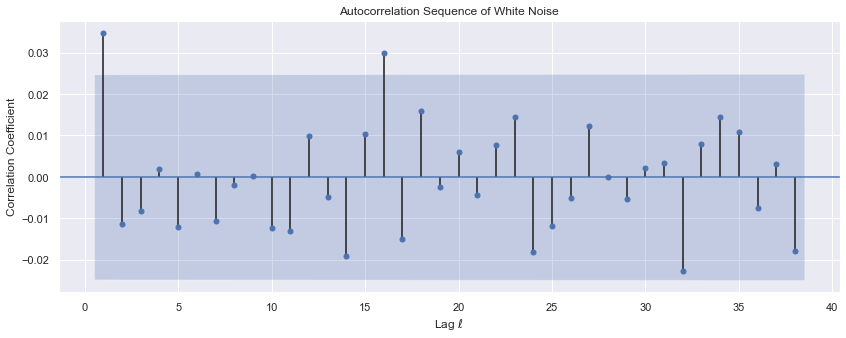

In [4]:
fig, ax = plt.subplots(figsize=(14, 5))
sgt.plot_acf(utils.generate_white_noise(), zero=False, ax=ax);
ax.set_ylabel('Correlation Coefficient')
ax.set_xlabel('Lag $\ell$')
ax.set_title('Autocorrelation Sequence of White Noise');

The autocorrelation of white noise contains both positive and negative coefficients. 
All the coefficients fall within the blue area, which means that the coefficients are not significant. Since the coefficients are effectively zero, the sign of each coefficient is rather arbitrary.
This suggests that there is no correlation for any lag.
This is in line of what we already know. White noise does not have any autocorrelation.

### Partial Autocorrelation

The main difference between autocorrelation and partial autocorrelation is that the ACF measures the accumulated effects past lags have on the current value, while the PACF measures the direct effect.

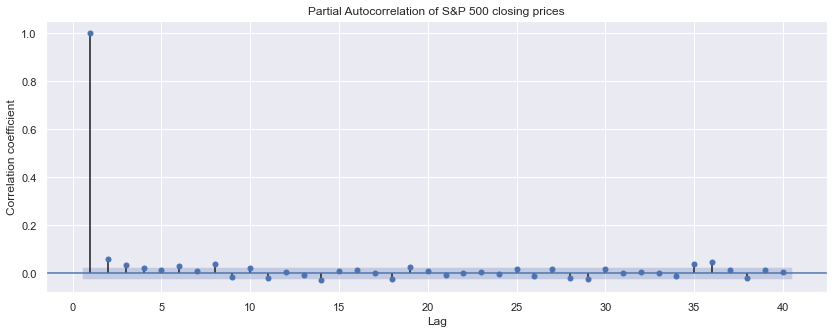

In [5]:
fig, ax = plt.subplots(figsize=(14, 5))
sgt.plot_pacf(utils.load_sp500_data(), zero=False, lags=40, method=('ols'), ax=ax);
ax.set_ylabel('Correlation coefficient')
ax.set_xlabel('Lag')
ax.set_title('Partial Autocorrelation of S&P 500 closing prices');

The only correlation coefficient of first lag is significantly different from zero.

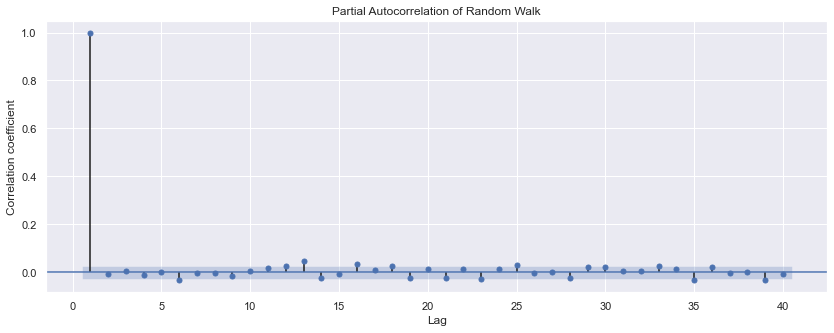

In [7]:
fig, ax = plt.subplots(figsize=(14, 5))
sgt.plot_pacf(utils.load_random_walk_data(), zero=False, lags=40, method=('ols'), ax=ax);
ax.set_ylabel('Correlation coefficient')
ax.set_xlabel('Lag')
ax.set_title('Partial Autocorrelation of Random Walk');

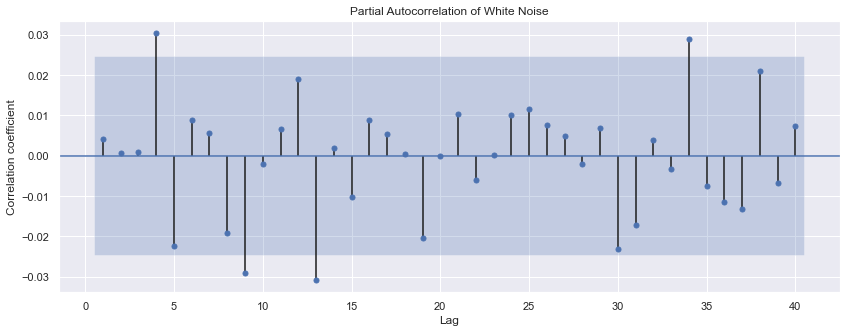

In [8]:
fig, ax = plt.subplots(figsize=(14, 5))
sgt.plot_pacf(utils.generate_white_noise(), zero=False, lags=40, method=('ols'), ax=ax);
ax.set_ylabel('Correlation coefficient')
ax.set_xlabel('Lag')
ax.set_title('Partial Autocorrelation of White Noise');